In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 12})

In [66]:
jsq = pd.DataFrame(columns=['load','avg_resp_time','avg_std-dev','avg_cost','avg_active_servers'])
for load in np.arange(0.2, 1, 0.2):
    fname = 'lb_alg-jsq-targetload-{}.csv'.format(str(load))
    df = pd.read_csv(fname)
    d = {
        'load': load,
        'avg_resp_time': df['AVG RESPONSE TIME'].mean(), 
        'avg_std-dev':df['STD DEV'].mean(),
        'avg_cost': df['COST'].mean(),
        'avg_active_servers': df['ACTIVE SERVERS'].mean()
    }
    jsq=jsq.append(d,ignore_index=True)

In [62]:
jsq

,load,avg_resp_time,avg_std-dev,avg_cost,avg_active_servers
0,0.2,2.155700,2.098105,157.863198,18.000000
1,0.4,2.137720,2.074219,157.893870,18.000000
2,0.6,2.148260,2.078374,134.938338,15.850000
3,0.8,2.158238,2.089078,103.297975,12.033333


In [58]:
roundrobin = pd.DataFrame(columns=['load','avg_resp_time','avg_std-dev','avg_cost','avg_active_servers'])
for load in np.arange(0.2, 1, 0.2):
    fname = 'lb_alg-roundrobin-targetload-{}.csv'.format(str(load))
    df = pd.read_csv(fname)
    d = {
        'load': load,
        'avg_resp_time': df['AVG RESPONSE TIME'].mean(), 
        'avg_std-dev':df['STD DEV'].mean(),
        'avg_cost': df['COST'].mean(),
        'avg_active_servers': df['ACTIVE SERVERS'].mean()
    }
    roundrobin=roundrobin.append(d,ignore_index=True)

In [59]:
roundrobin

,load,avg_resp_time,avg_std-dev,avg_cost,avg_active_servers
0,0.2,2.351743,2.453784,157.647745,18.000000
1,0.4,2.351553,2.434799,157.549350,18.000000
2,0.6,2.378124,2.450773,133.145153,15.600000
3,0.8,2.599287,2.559729,104.228084,12.033333


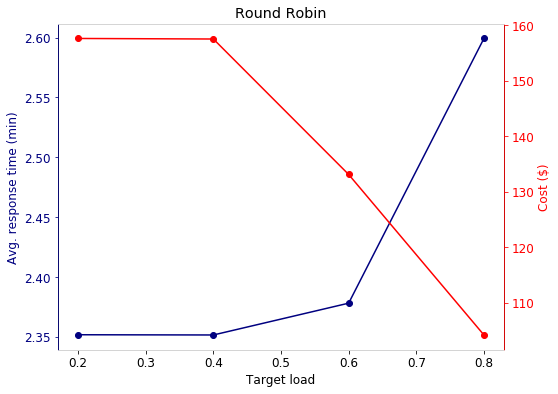

In [79]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(roundrobin.load, roundrobin.avg_resp_time, '-o',color='#000080')
ax2 = ax.twinx()
ax2.plot(roundrobin.load, roundrobin.avg_cost, 'o-r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('navy')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')


ax.set_ylabel('Avg. response time (min)')
ax.yaxis.label.set_color('navy')
ax.tick_params(axis='y', colors='navy')
ax.set_xlabel('Target load')

ax2.set_ylabel('Cost ($)')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')

ax.set_title('Round Robin')
plt.savefig('roundrobin.pdf')

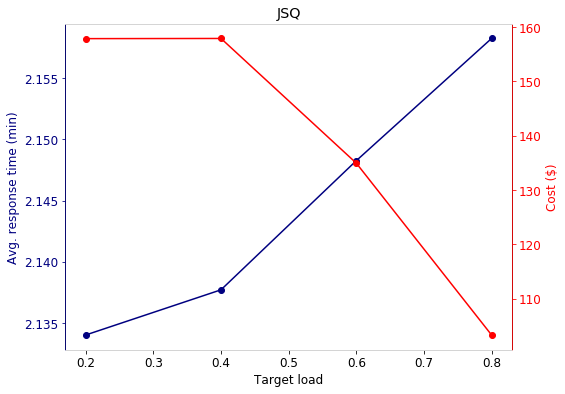

In [78]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(jsq.load, jsq.avg_resp_time, '-o',color='#000080')
ax2 = ax.twinx()
ax2.plot(jsq.load, jsq.avg_cost, 'o-r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('navy')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')


ax.set_ylabel('Avg. response time (min)')
ax.yaxis.label.set_color('navy')
ax.tick_params(axis='y', colors='navy')
ax.set_xlabel('Target load')

ax2.set_ylabel('Cost ($)')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')

ax.set_title('JSQ')
plt.savefig('jsq.pdf')